<a href="https://colab.research.google.com/github/timotdsantos/Data_Science_Samples/blob/master/YOLO_on_Tax_Forms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO V3 on Colab for images/videos

##### From: https://github.com/AlexeyAB/darknet

[2-Nov-19] Retrained printed model (4000 iter weights) using combined print+hw training data


## Install requirements

In [ ]:
import os
# We will be using a forked version of Darknet which 
# allows us to suppress the display from OpenCV, when running
# object detection on videos

if not os.path.isdir('./darknet'):
  !ls
  !rm -fr darknet
  !git clone https://github.com/timotdsantos/darknet.git

sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 11013, done.
remote: Total 11013 (delta 0), reused 0 (delta 0), pack-reused 11013
Receiving objects: 100% (11013/11013), 10.68 MiB | 10.52 MiB/s, done.
Resolving deltas: 100% (7406/7406), done.


In [ ]:
!ls
%cd darknet
!ls
% cd ..

darknet  sample_data
/content/darknet
3rdparty      cmake		      image_yolov2.sh	     net_cam_v3.sh
appveyor.yml  CMakeLists.txt	      image_yolov3.sh	     README.md
build	      DarknetConfig.cmake.in  include		     scripts
build.ps1     darknet.py	      json_mjpeg_streams.sh  src
build.sh      darknet_video.py	      LICENSE		     video_v2.sh
cfg	      data		      Makefile		     video_yolov3.sh
/content


### Install GPU drivers

In [ ]:
#Installing CUDA pre-requisites
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

!apt update

--2019-11-04 11:16:13--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.182.215
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.182.215|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?U_B1M7_cn3nzrUL6knhEWdgexg1tAXpY0nP5Xw_SMNnB_SWiZpY69tt2FY8PtXYj2lf0jcJ8AJmDJ9ElZTS3JY_x0uSlBX-HWu5bqrAWADn1iKolas4PLiTZEkyHfE9TyYS_P29ICH7WNlW5sMii9EcxI1E3-11s983FDvZwNlTFb6gk6cxLNGfCn6lT_qcL6sxJQE-8_vx321DVvZMx6vOr_g [following]
--2019-11-04 11:16:13--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?U_B1M7_cn3nzrUL6knhEWdgexg1tAXpY0nP5Xw_SMNnB_SWiZpY69tt2FY8PtXYj2lf0jcJ8AJmDJ9ElZTS3JY_x0uSl

In [ ]:
#Installing CUDA
!apt install cuda-8-0 -y

# If there is an issue installing CUDA, 
# try installing cuda-visual-tools again
# Comment the earlier command to install cuda
# Uncomment and run the below command

#!apt --fix-broken install cuda-visual-tools-8-0 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cuda-command-line-tools-8-0 cuda-core-8-0 cuda-cublas-8-0
  cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0 cuda-cufft-8-0
  cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0 cuda-cusolver-8-0
  cuda-cusolver-dev-8-0 cuda-cusparse-8-0 cuda-cusparse-dev-8-0
  cuda-demo-suite-8-0 cuda-documentation-8-0 cuda-driver-dev-8-0
  cuda-license-8-0 cuda-misc-headers-8-0 cuda-npp-8-0 cuda-npp-dev-8-0
  cuda-nvgraph-8-0 cuda-nvgraph-dev-8-0 cuda-nvml-dev-8-0 cuda-nvrtc-8-0
  cuda-nvrtc-dev-8-0 cuda-runtime-8-0 cuda-samples-8-0 cuda-toolkit-8-0
  cuda-visual-tools-8-0
The following NEW packages will be installed:
  cuda-8-0 cuda-command-line-tools-8-0 cuda-core-8-0 cuda-cublas-8-0
  cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0 cuda-cufft-8-0
  cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0 cuda-cusolver-8-0
  cuda-cuso

In [ ]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [ ]:
#Installing compilers
!apt install gcc-5 g++-5 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 39 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http://arch

In [ ]:
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

In [ ]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [ ]:
!pwd

/content




### Compile Options (openCV/GPU/Cuda)



In [ ]:
#Changing the variables to include OpenCV and GPU in the Makefile
#% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

sed: can't read Makefile: No such file or directory
sed: can't read Makefile: No such file or directory
sed: can't read Makefile: No such file or directory


In [ ]:
# Apparently we need to install this so that OpenCV can work without any issues
# when we are making the file
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
%cd darknet
!ls

/content/darknet
3rdparty      cmake		      image_yolov2.sh	     net_cam_v3.sh
appveyor.yml  CMakeLists.txt	      image_yolov3.sh	     README.md
build	      DarknetConfig.cmake.in  include		     scripts
build.ps1     darknet.py	      json_mjpeg_streams.sh  src
build.sh      darknet_video.py	      LICENSE		     video_v2.sh
cfg	      data		      Makefile		     video_yolov3.sh


In [ ]:
#Running make! Makes Cuda driver
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:228:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
gcc -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘convolution_2d’:
./src/gemm.c:2037:15: warning: unused variable ‘out_w’ [-Wunused-variable]
     const int out_w = (w + 2 * pad - ksize) / stride + 1;    // output_width=input_width for s

In [ ]:
# Import libraries for display
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Train Custom Objects (i.e. Form fields)

### Connect to cloud to download dataset

In [ ]:
!gcloud config set project {"river-runner-248212"}

Updated property [core/project].


In [ ]:
# get zip file of document detection model from google cloud, copy to local dir
!gsutil cp gs://labidub/out_imp_perf.zip ./

Copying gs://labidub/out_imp_perf.zip...
- [1 files][ 33.3 MiB/ 33.3 MiB]                                                
Operation completed over 1 objects/33.3 MiB.                                     


In [ ]:
!unzip out_imp_perf.zip

Archive:  out_imp_perf.zip
   creating: out_imp_perf/data/
  inflating: out_imp_perf/data/obj.data  
 extracting: out_imp_perf/data/obj.names  
   creating: out_imp_perf/data/obj/
  inflating: out_imp_perf/data/obj/imperf3.jpg  
  inflating: out_imp_perf/data/obj/imperf3.txt  
  inflating: out_imp_perf/data/obj/imperf4.jpg  
  inflating: out_imp_perf/data/obj/imperf4.txt  
  inflating: out_imp_perf/data/obj/imperf5.jpg  
  inflating: out_imp_perf/data/obj/imperf5.txt  
  inflating: out_imp_perf/data/obj/imperf6.jpg  
  inflating: out_imp_perf/data/obj/imperf6.txt  
  inflating: out_imp_perf/data/obj/perf10.jpg  
  inflating: out_imp_perf/data/obj/perf10.txt  
  inflating: out_imp_perf/data/obj/perf11.jpg  
  inflating: out_imp_perf/data/obj/perf11.txt  
  inflating: out_imp_perf/data/obj/perf12.jpg  
  inflating: out_imp_perf/data/obj/perf12.txt  
  inflating: out_imp_perf/data/obj/perf13.jpg  
  inflating: out_imp_perf/data/obj/perf13.txt  
  inflating: out_imp_perf/data/obj/perf14.jp

In [ ]:
# copy unzipped folder into local dir
!cp -r out_imp_perf/data/ ./

In [ ]:
!cat data/obj/completedform0.txt

0 0.184143 0.121814 0.179913 0.020246
1 0.366812 0.317021 0.545852 0.040155

In [ ]:
# Split train and test
!cat out_imp_perf/data/train.txt data/train.txt | sed -e 's/jpgdata/jpg\ndata/g' > temp_train.txt
!cat out_imp_perf/data/test.txt data/test.txt | sed -e 's/jpgdata/jpg\ndata/g' > temp_test.txt

In [ ]:
!mv temp_train.txt data/train.txt
!mv temp_test.txt data/test.txt

### Steps to change the config file:
https://medium.com/@manivannan_data/how-to-train-yolov3-to-detect-custom-objects-ccbcafeb13d2

In [ ]:
# change config file once downloaded, then move uploaded version to correct directory
# move the downloaded file to cfg directory
!mv out_imp_perf/yolov3-tiny-2C.cfg ./cfg/yolo-hw-obj.cfg #handwritten pilot



mv: cannot stat 'out_imp_perf/yolov3-tiny-2C.cfg': No such file or directory


In [ ]:
# get the CNN and save
# feature extractor
!wget https://pjreddie.com/media/files/darknet53.conv.74 

--2019-11-02 19:31:10--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  16.9MB/s    in 11s     

2019-11-02 19:31:22 (14.6 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



### Download Training Data from Google Drive for Custom Images

In [ ]:
!ls backup
!cp backup/YOLO.zip ./

test.txt		  yolo-obj_last.weights     yolov3-tiny_4000.weights
weights			  yolov3-tiny_1000.weights  yolov3-tiny_final.weights
yolo-hw-obj_last.weights  yolov3-tiny_2000.weights  yolov3-tiny_last.weights
yolo-obj.cfg		  yolov3-tiny_3000.weights  YOLO.zip


In [ ]:
!unzip ./YOLO.zip

Archive:  ./YOLO.zip
  inflating: YOLO/data/obj.data      
 extracting: YOLO/data/obj.names     
  inflating: YOLO/data/obj/completedform0.png  
  inflating: YOLO/data/obj/completedform0.txt  
  inflating: YOLO/data/obj/completedform1.png  
  inflating: YOLO/data/obj/completedform1.txt  
  inflating: YOLO/data/obj/completedform10.png  
  inflating: YOLO/data/obj/completedform10.txt  
  inflating: YOLO/data/obj/completedform11.png  
  inflating: YOLO/data/obj/completedform11.txt  
  inflating: YOLO/data/obj/completedform12.png  
  inflating: YOLO/data/obj/completedform12.txt  
  inflating: YOLO/data/obj/completedform13.png  
  inflating: YOLO/data/obj/completedform13.txt  
  inflating: YOLO/data/obj/completedform14.png  
  inflating: YOLO/data/obj/completedform14.txt  
  inflating: YOLO/data/obj/completedform15.png  
  inflating: YOLO/data/obj/completedform15.txt  
  inflating: YOLO/data/obj/completedform16.png  
  inflating: YOLO/data/obj/completedform16.txt  
  inflating: YOLO/data/ob

In [ ]:
# !cp -r YOLO/data ./
!cp out_imp_perf/yolo-obj.cfg ./cfg/

In [ ]:
# !cp ./backup/yolo-obj.cfg cfg/yolo-hw2-obj.cfg
!cp /content/drive/My\ Drive/weights/yolo-both-tiny.cfg cfg/yolo-hw2-obj.cfg

In [ ]:
!sed -i 's/max_batches .*/max_batches = 2000/g' cfg/yolo-hw2-obj.cfg 
!sed -i 's/^steps=.*/steps=1600,1800/g' cfg/yolo-hw2-obj.cfg 

In [ ]:
# !cat cfg/yolo-hw2-obj.cfg | head -n 25
!cat cfg/yolo-obj.cfg | head -n 25

[net]
# Testing
batch=64
subdivisions=64
# Training
# batch=64
# subdivisions=16
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 5200
policy=steps
steps=4160,4780
scales=.1,.1

[convolutional]


### Train custom image

#### Do this for pretrained model. Go to next section to update training from previous form detection model

In [ ]:
!cp ../yolo-both-tiny.cfg cfg/yolo-both-obj.cfg

In [ ]:
!cat cfg/yolov3-hw-tiny.cfg | head -n 25

[net]
# Testing
batch=64
subdivisions=64
# Training
# batch=64
# subdivisions=2
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 1000
policy=steps
steps=800,900
scales=.1,.1

[convolutional]


In [ ]:
!ls backup

test.txt		   yolo-obj_last.weights     yolov3-tiny_final.weights
weights			   yolov3-tiny_1000.weights  yolov3-tiny_last.weights
yolo-hw-obj_final.weights  yolov3-tiny_2000.weights  YOLO.zip
yolo-hw-obj_last.weights   yolov3-tiny_3000.weights
yolo-obj.cfg		   yolov3-tiny_4000.weights


In [ ]:
# !sed -i 's/subdivisions .*/subdivisions=64/g' cfg/yolo-obj.cfg 
!sed -i 's/max_batches .*/max_batches = 6000/g' cfg/yolov3-hw-tiny.cfg
!sed -i 's/^steps=.*/steps=5600,5800/g' cfg/yolov3-hw-tiny.cfg
# !sed -i 's/^burn_in=.*/burn_in=4100/g' cfg/yolov3-tiny.cfg 

In [ ]:
# Train model (last layers only) on top of pre-trained model to get custom detection model
# !./darknet detector train data/obj.data cfg/yolo-hw-obj.cfg darknet53.conv.74 -dont_show
!./darknet detector train data/obj.data cfg/yolov3-hw-tiny.cfg backup/yolov3-tiny_4000.weights -dont_show
# !./darknet detector train data/obj.data cfg/yolo-both-obj.cfg backup/yolov3-tiny_4000.weights -dont_show

# !./darknet detector train data/obj.data cfg/yolo-obj.cfg darknet53.conv.74 -dont_show
# !./darknet detector train data/obj.data cfg/yolo-hw-obj.cfg darknet53.conv.74 -dont_show
# !./darknet detector train data/obj.data cfg/yolo-obj.cfg ../yolo-obj_5000.weights -dont_show
# !./darknet detector train data/obj.data ../yolov3-tiny.cfg backup/yolo-obj_5000.weights -dont_show

# !./darknet detector train data/obj.data ../yolov3-tiny.cfg backup/yolo-obj_5000.weights -dont_show


yolov3-hw-tiny
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
  10 conv    512       3 x 3/ 1     13 x  13 x 256 ->   13 x  13 x 512 0.399 BF
  11 max                2x 2/ 1     1

In [ ]:
!gsutil cp backup/* gs://labidub/

## Detect Custom Objects

In [ ]:
#  Note: To output the bounding box dimensions, need to alter the src/image.c file, adding the following line in the draw_detection_v3 method:
# printf("Bounding Box: Left=%d, Top=%d, Right=%d, Bottom=%d\n", left, top, right, bot);

In [ ]:
# detect from image using final weights of model we just trained
!./darknet detect cfg/yolo-obj.cfg ./backup/yolo-obj_final.weights ../test1.png -dont_show

In [ ]:
!gsutil cp predictions.jpg gs://labidub/test1_out.jpg
!./darknet detect cfg/yolo-obj.cfg ./backup/yolo-obj_final.weights ../test2.png -dont_show
!gsutil cp predictions.jpg gs://labidub/test2_out.jpg


In [ ]:
# display resulting image with bboxes of detected objects
image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.axis("off")
# plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

### Continue training from Last Weights

In [ ]:
# look inside public labidub directory
!gsutil ls gs://labidub

gs://labidub/DS_test.tar.gz
gs://labidub/DS_train.tar.gz
gs://labidub/Dataset.tar.gz
gs://labidub/Dataset_Fill.tar.gz
gs://labidub/Mouth_Images_50_100.zip
gs://labidub/annotation.zip
gs://labidub/out_imp_perf.zip
gs://labidub/results.csv
gs://labidub/speech_25khz.tar.gz
gs://labidub/yolo-obj_5000.weights
gs://labidub/yolo-obj_final.weights
gs://labidub/yolo-obj_last.weights
gs://labidub/yolov3-tiny_1000.weights
gs://labidub/yolov3-tiny_2000.weights
gs://labidub/yolov3-tiny_3000.weights
gs://labidub/yolov3-tiny_4000.weights
gs://labidub/yolov3-tiny_final.weights
gs://labidub/yolov3-tiny_last.weights
gs://labidub/saved_lips_baseline/


In [ ]:
# copy over the trained final weights (4000 epochs)
!gsutil cp gs://labidub/yolo-obj_5000.weights ./backup/



Copying gs://labidub/yolov3-tiny_final.weights...
\ [1 files][ 33.1 MiB/ 33.1 MiB]                                                
Operation completed over 1 objects/33.1 MiB.                                     
Copying gs://labidub/yolo-obj_5000.weights...
\ [1 files][ 33.1 MiB/ 33.1 MiB]                                                
Operation completed over 1 objects/33.1 MiB.                                     


## Update Batches

In [ ]:
# [Optional] When you need to add more batch/epochs from the previous run
!sed -i 's/max_batches .*/max_batches = 6000/g' cfg/yolo-obj.cfg 
!sed -i 's/^steps=.*/steps=5100,5900/g' cfg/yolo-obj.cfg 

In [ ]:

!cat cfg/yolo-hw-obj.cfg | head -n 25

[net]
# Testing
batch=24
subdivisions=8
# Training
# batch=64
# subdivisions=2
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 5500
policy=steps
steps=4400,4950
scales=.1,.1

[convolutional]


In [ ]:
!./darknet detector train data/obj.data ./cfg/yolo-hw-obj.cfg ./backup/yolo-hw-obj_last.weights -dont_show


yolo-hw-obj
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
  10 conv    512       3 x 3/ 1     13 x  13 x 256 ->   13 x  13 x 512 0.399 BF
  11 max                2x 2/ 1     13 x

In [ ]:
# Backup weights to cloud
!gsutil cp ./backup/* gs://labidub/


Copying file://./backup/yolo-obj_5000.weights [Content-Type=application/octet-stream]...
Copying file://./backup/yolo-obj_final.weights [Content-Type=application/octet-stream]...
Copying file://./backup/yolo-obj_last.weights [Content-Type=application/octet-stream]...
Copying file://./backup/yolov3-tiny_final.weights [Content-Type=application/octet-stream]...
/
Operation completed over 4 objects/132.4 MiB.                                    


### Test detection using final weights

In [ ]:
# Get the latest weights. Final weights - classification network.
!gsutil cp gs://labidub/yolov3-tiny_final.weights ./backup/


Copying gs://labidub/yolov3-tiny_final.weights...
\ [1 files][ 33.1 MiB/ 33.1 MiB]                                                
Operation completed over 1 objects/33.1 MiB.                                     


In [ ]:
# need to copy newly labelled object names to coco.names
!cp data/obj.names data/coco.names

In [ ]:
!gsutil cp gs://labidub/Forms

In [ ]:

!./darknet detect ./cfg/yolo-both-obj.cfg ./backup/yolo-both-obj_final.weights ./data/obj/perf14.jpg -dont_show



   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
  10 conv    512       3 x 3/ 1     13 x  13 x 256 ->   13 x  13 x 512 0.399 BF
  11 max                2x 2/ 1     13 x  13 x 512 -

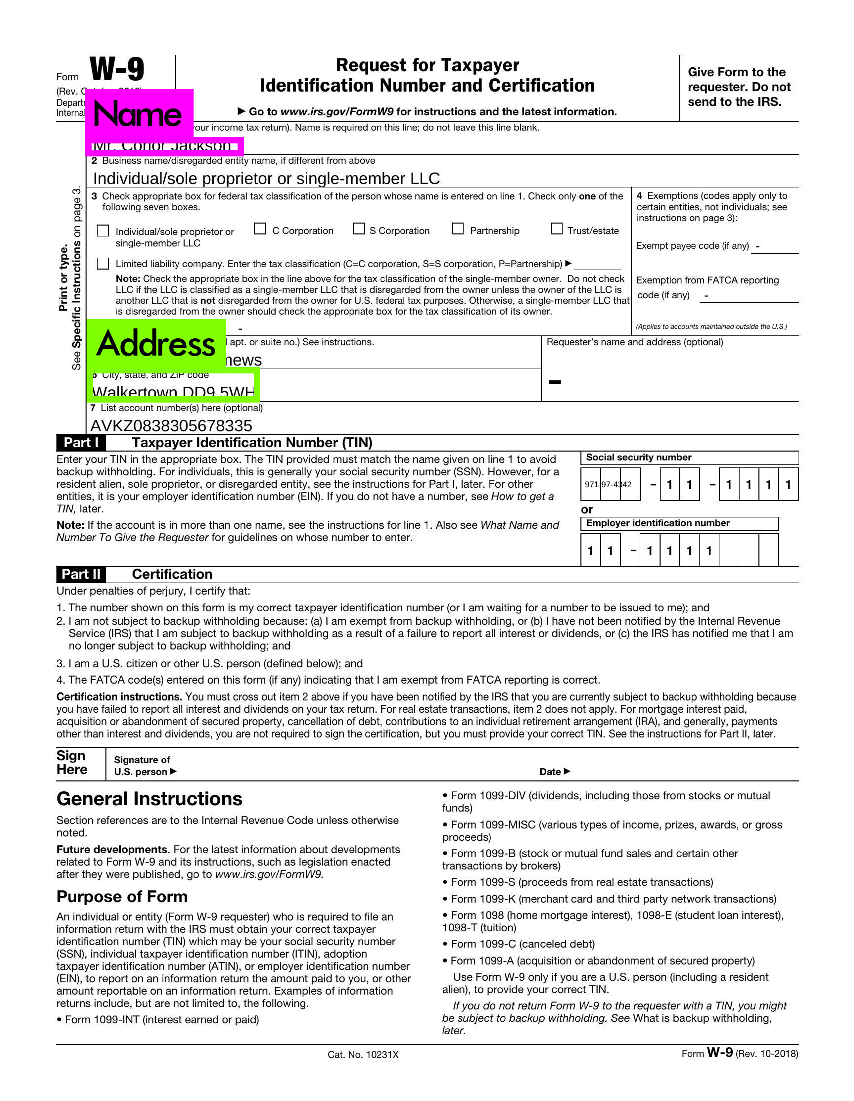

In [ ]:
# display resulting image with detected objects
image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.axis("off")

plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

## Link Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mv backup backup2

In [ ]:
!ln -s /content/drive/My\ Drive/weights/ backup
!ls backup

test.txt		     yolo-print2c_last.weights
yolo-both-4c-tiny.cfg	     yolov3-tiny_1000.weights
yolo-both-obj_final.weights  yolov3-tiny_2000.weights
yolo-both-obj_last.weights   yolov3-tiny_3000.weights
yolo-both-tiny.cfg	     yolov3-tiny_4000.weights
yolo-hw-obj_final.weights    yolov3-tiny_final.weights
yolo-hw-obj_last.weights     yolov3-tiny_last.weights
yolo-obj.cfg		     YOLO.zip
yolo-obj_last.weights


In [ ]:
!ls ./backup/weights

In [ ]:
!cp /content/drive/My\ Drive/weights/YOLO.zip ./